@ Author Mohammed Topiwalla
Date 12/03/2018
#### Machine Learning SVM and ANN Assignment
> This notebook is an extension of the original notebook discussed by the professor at college.
> The notebook includes classification for lasagna and gnochi types of pasta.

##### The notebook is structured in the following way
* Load all basic packages that would be used
* Define directories and plot a single image for each type of pasta
* Break down the image into pixel values and apply appropriate transformations
* Begin the classification with SVM
* Check for most apt C values in svm, make the final model, see the accuracy and assess the model
* Begin with the process of data transformation for ANN
* Define ANN model , check accuracy and assess the model
* Conclusions

###### Note-
* *HOG (Histogram of gradient method was not used)*
* *The notebook is a pure python 3.0 notebook breed*
* *Tensorflow is used at the back*

In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import cohen_kappa_score
import pandas as pd
import seaborn as sns
import matplotlib.image as img
from skimage.transform import resize
from sklearn import svm
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
print("=================== Packages Loaded ===================")


=================== Packages Loaded ===================


=================== Loading Data ===================
Image 1 : Ragu 	 2:Carbonara 	 3:Lasagna 	 4:gnocchi


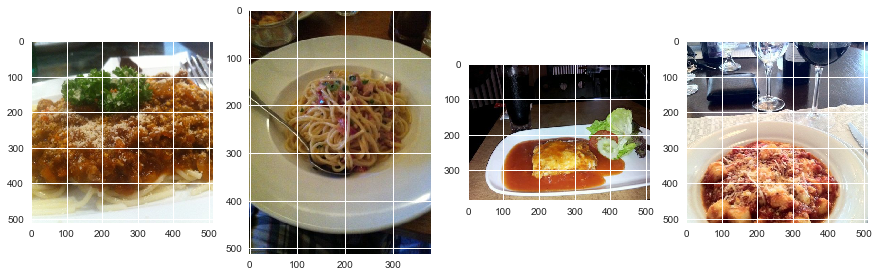

In [3]:
print("=================== Loading Data ===================")
root_dir = 'food/'
ragu_dir = 'spaghetti_bolognese/'
carbonara_dir = 'spaghetti_carbonara/'
lasagna_dir = 'lasagna/'
gnocchi_dir = 'gnocchi/'

all_ragu = os.listdir(os.path.join(root_dir, ragu_dir))
all_carbonara = os.listdir(os.path.join(root_dir, carbonara_dir))
all_lasagna = os.listdir(os.path.join(root_dir, lasagna_dir))
all_gnocchi = os.listdir(os.path.join(root_dir, gnocchi_dir))

print("Image 1 : Ragu \t 2:Carbonara \t 3:Lasagna \t 4:gnocchi")
fig, ax = plt.subplots(1,4, frameon=False, figsize=(15, 20))
rand_img = np.random.choice(all_ragu)
img = plt.imread(os.path.join(root_dir, ragu_dir, rand_img))
ax[0].imshow(img)

rand_img = np.random.choice(all_carbonara)
img = plt.imread(os.path.join(root_dir, carbonara_dir, rand_img))
ax[1].imshow(img)

rand_img = np.random.choice(all_lasagna)
img = plt.imread(os.path.join(root_dir, lasagna_dir, rand_img))
ax[2].imshow(img)

rand_img = np.random.choice(all_gnocchi)
img = plt.imread(os.path.join(root_dir, gnocchi_dir, rand_img))
ax[3].imshow(img)

plt.show()

In [4]:
start_time = time.time()
print("=================== Transforming images to Matrices ===================")
import matplotlib.image as img

target_w = 65
target_h = 65
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_ragu:
    img_arr = img.imread(os.path.join(root_dir, ragu_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)
print("=================== Raggu Loaded ===================")

for img_name in all_carbonara:
    img_arr = img.imread(os.path.join(root_dir, carbonara_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)
print("=================== Carbonara Loaded ===================")

for img_name in all_lasagna:
    img_arr = img.imread(os.path.join(root_dir, lasagna_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(2)
print("=================== Lasagna Loaded ===================")

for img_name in all_gnocchi:
    img_arr = img.imread(os.path.join(root_dir,gnocchi_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(3)
print("=================== Gnnochi Loaded ===================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

=================== Transforming images to Matrices ===================
=================== Raggu Loaded ===================
=================== Carbonara Loaded ===================
=================== Lasagna Loaded ===================
=================== Gnnochi Loaded ===================
Duration: --- 2.8268959283828736 Minutes ---


In [9]:
print("Gnochi size:"+str(len(all_gnocchi)))
print("Lasagna size:"+str(len(all_lasagna)))
print("Ragu size:"+str(len(all_ragu)))
print("Carbonara size:"+str(len(all_carbonara)))

Gnochi size:1000
Lasagna size:999
Ragu size:1000
Carbonara size:1000


##### While loading data if we check lasagna has 999 images that is because its file had one ambigous image which was removed! The image is this-

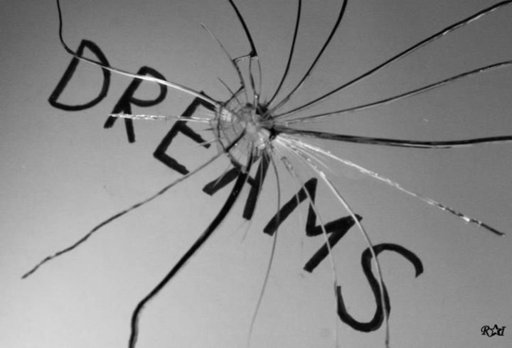

In [43]:
print("=================== Defining Test and Train Values ===================")
print("=================== Split of 50:25:25 ===================")
X = np.array(all_imgs)
Y = all_labels
#Y = Y[:,0]

n,w,l,d = X.shape
X_raw = np.reshape(X,(n,w*l*d))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

x, x_test, y, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.333, random_state=42)
print("For Main Data Set :",len(all_imgs))
print("For Train Set :",len(x_train))
print("For Validation Set :",len(x_val))
print("For Test Set :",len(x_test))

=================== Defining Test and Train Values ===================
=================== Split of 50:25:25 ===================
For Main Data Set : 3999
For Train Set : 2000
For Validation Set : 999
For Test Set : 1000


In [51]:
print('Training data shape : ', x_train.shape,len(y_train))
print('Validation data shape : ', x_val.shape,len(y_val))
print('Testing data shape : ', x_test.shape,len(y_test))

Training data shape :  (2000, 12675) 2000
Validation data shape :  (999, 12675) 999
Testing data shape :  (1000, 12675) 1000


In [52]:
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  4
Output classes :  [0 1 2 3]


Ok ! Perfect so now we have transformed our data set brought it in a numpy array shape and most importantly defined our train and test set

##### Here essentially I am running multiple SVM's for classification to find optimal c Value
*I am using the validation data set here to find optimal c value*
> Lower C value leads to more flexiblity and leads to higher training error
>
> Higher C value leads to less flexibility and leads to lower training error

Acc Train: 0.970500, Acc Test:0.393393
Acc Train: 1.000000, Acc Test:0.369369
Acc Train: 1.000000, Acc Test:0.369369


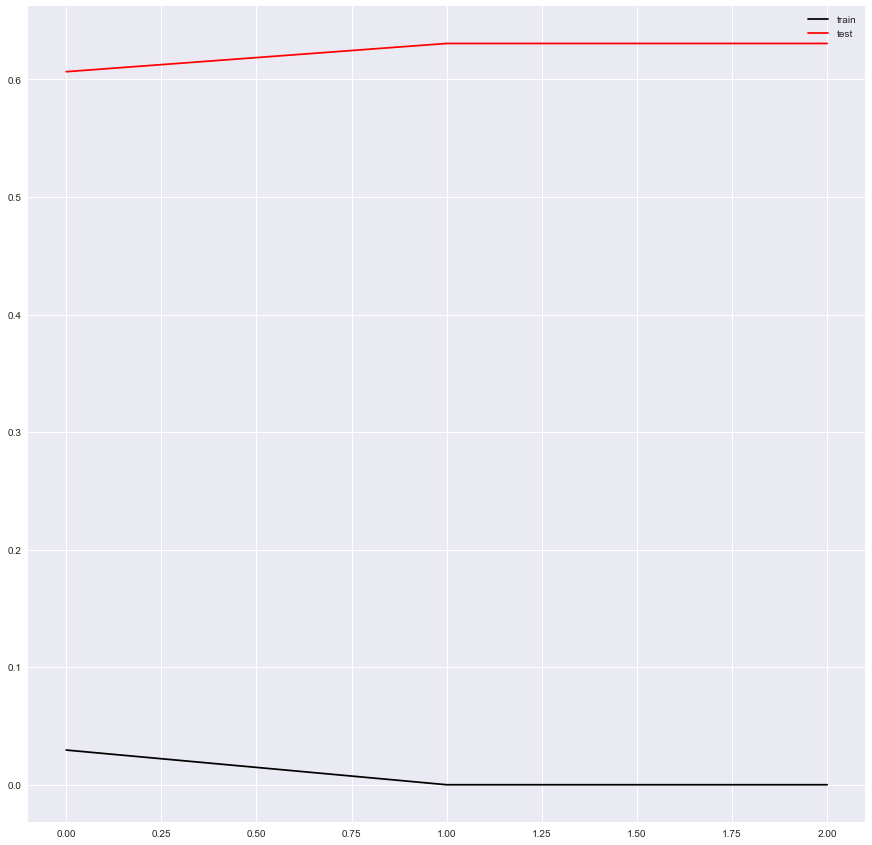

Duration: --- 14.0785848736763 Minutes ---


In [53]:
start_time = time.time()
C_values = [0.001,1.0,100.0]
prediction_error = []
train_error = []

for C_val in C_values:
    clf = svm.SVC(kernel='linear', C=C_val)
    clf.fit(x_train, y_train)
    score_train = clf.score(x_train, y_train)
    score_test = clf.score(x_val,y_val)
    train_error.append(1-score_train)
    prediction_error.append(1-score_test) 
    print("Acc Train: %f, Acc Test:%f"%(score_train,score_test))
plt.figure(1, figsize=(15, 15))
plt.clf()
plt.plot(range(len(C_values)),train_error,color='k',label='train')
plt.plot(range(len(C_values)),prediction_error,color='r',label='test')
plt.legend(loc=1)
plt.show()
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

##### Performing cross validation and checking which combination of svm with a different kernel gives awesome results based on the c value derived from above to plug into the models below

In [57]:
start_time = time.time()
models = (
          svm.SVC(kernel='rbf', C=1),
          svm.SVC(kernel='rbf', gamma=10, C=1),
          svm.SVC(kernel='sigmoid', C=1, gamma=0.1),
          svm.SVC(kernel='poly', degree=2, gamma=0.5, C=0.001))


for idx,model in enumerate(models):
    model.fit(x_train,y_train)
    tr_error = 1-model.score(x_train,y_train)
    val_error = 1-model.score(x_val,y_val)
    ts_error = 1-model.score(x_test,y_test)
    print("Model:%d, Train Error:%f, Val Error:%f, Test Error:%f"%(idx,tr_error,val_error,ts_error))
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

Model:0, Train Error:0.164500, Val Error:0.512513, Test Error:0.524000
Model:1, Train Error:0.000000, Val Error:0.762763, Test Error:0.758000
Model:2, Train Error:0.735500, Val Error:0.709710, Test Error:0.707000
Model:3, Train Error:0.000000, Val Error:0.633634, Test Error:0.635000
Duration: --- 20.132408193747203 Minutes ---
